## Exercise 3

## Nueral Network

*In this exercise, we build a neural network from scratch only using the numpy package and take a look at the loss function*

In [3]:
import numpy as np
import matplotlib.pyplot as plt
data1=np.loadtxt("mnist_small_train_in.txt" ,delimiter= ",")
data1=data1.T
data3=np.loadtxt("mnist_small_test_in.txt" , delimiter= ",")
data3=data3.T
data2=np.loadtxt("mnist_small_train_out.txt")
data4=np.loadtxt("mnist_small_test_out.txt")
y=np.zeros((10 ,6006))
for i in range(0,6006):
    temp=int(data2[i])
    y[(temp,i)]=1 #One hot encoding
    
def sigmoid_derv(z):      #defining the activation functions and its derivatives
    s = 1./( 1.+ np.exp(-z ))
    return s*(1-s)

def sigmoid(z):
    s = 1./(1.+ np.exp(-z ))
    return s

def softmax(Z):
    return np.exp(Z)/np.sum(np.exp(Z))

*We build the neural network with 2 hideen layers, first layer having 128 neurons and the second layer having 64 neurons*

In [22]:
alpha=0.01
w1=np.random.randn(128 ,784) #initialization of weights and biases
b1=np.random.randn(128 ,1)
w2=np.random.randn(64 ,128)
b2=np.random.randn(64 ,1)
w3=np.random.randn(10 ,64)
b3=np.random.randn(10 ,1)
classification =[]
loss =[]
for i in range(300):
    
    print("epoch:{} running".format(i))
    for i in range(6006):
        A0=np.reshape(data1[:,i] ,(784 ,1))
        Z1=np.dot(w1, A0)+b1
        A1=sigmoid(Z1)
        Z2=np.dot(w2, A1)+b2
        A2=sigmoid(Z2)
        Z3=np.dot(w3, A2)+b3
        A3=softmax(Z3)
        
        d=(0.5)*(A3-np.reshape(y[:,i],(10 ,1)))**2
        
        d1=np.sum(d)
        #print(d1)
        loss.append(d1)
        dz3=A3-np.reshape(y[:,i],(10 ,1))
        dw3=np.dot(dz3 , A2.T)
        db3=dz3
        dz2=np.dot(w3.T , dz3)*sigmoid_derv (Z2)
        dw2=np.dot(dz2 , A1.T)
        db2=dz2
        dz1=np.dot(w2.T,dz2)*sigmoid_derv (Z1)
        dw1=np.dot(dz1 , A0.T)
        db1=dz1
        
        w3=w3-alpha*dw3
        w1=w1-alpha*dw1
        w2=w2-alpha*dw2
        
        b1=b1-alpha*db1
        b2=b2-alpha*db2
        b3=b3-alpha*db3
    right=0
    wrong=0
    
for i in range (1004):
    A0=np.reshape(data3[:,i],(784 ,1))
    Z1=np.dot(w1, A0)+b1
    A1=sigmoid(Z1)
    Z2=np.dot(w2, A1)+b2
    A2=sigmoid(Z2)
    Z3=np.dot(w3, A2)+b3
    A3=softmax(Z3)
    A3=A3.tolist()
    detection=A3.index(max(A3))
    if data4[i]==detection:
        right=right+1
    else:
        wrong=wrong+1
   

epoch:0 running
epoch:1 running
epoch:2 running
epoch:3 running
epoch:4 running
epoch:5 running
epoch:6 running
epoch:7 running
epoch:8 running
epoch:9 running
epoch:10 running
epoch:11 running
epoch:12 running
epoch:13 running
epoch:14 running
epoch:15 running
epoch:16 running
epoch:17 running
epoch:18 running
epoch:19 running
epoch:20 running
epoch:21 running
epoch:22 running
epoch:23 running
epoch:24 running
epoch:25 running
epoch:26 running
epoch:27 running
epoch:28 running
epoch:29 running
epoch:30 running
epoch:31 running
epoch:32 running
epoch:33 running
epoch:34 running
epoch:35 running
epoch:36 running
epoch:37 running
epoch:38 running
epoch:39 running
epoch:40 running
epoch:41 running
epoch:42 running
epoch:43 running
epoch:44 running
epoch:45 running
epoch:46 running
epoch:47 running
epoch:48 running
epoch:49 running
epoch:50 running
epoch:51 running
epoch:52 running
epoch:53 running
epoch:54 running
epoch:55 running
epoch:56 running
epoch:57 running
epoch:58 running
epoch:5

Text(0, 0.5, 'loss fn')

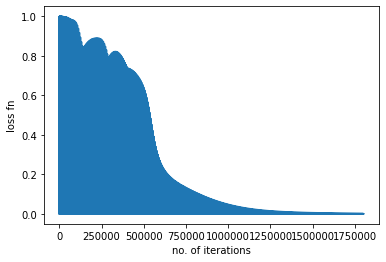

In [28]:
plt.ticklabel_format(style='plain')
plt.plot(range(1801800),loss)
plt.xlabel('no. of iterations')
plt.ylabel('loss fn')

*From the above plot we can see that the loss function decreases as the iterations or epochs increases*